In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
from scipy.stats import entropy, ttest_ind
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
data = pd.read_csv("C:/Users/10331/OneDrive/Documents/GitHub/Emory-ISOM672-Intro-to-BA/BA project/hotel_bookings.csv")

In [3]:
data.shape

(119390, 32)

In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
data.groupby("arrival_date_year").agg(["mean","std"])

is_canceled             lead_time              \
                         mean       std        mean         std   
arrival_date_year                                                 
2015                 0.370158  0.482858   97.245999  105.104227   
2016                 0.358633  0.479603  102.870369  106.582358   
2017                 0.386979  0.487065  109.259223  107.940953   

                  arrival_date_week_number             \
                                      mean        std   
arrival_date_year                                       
2015                             39.618976   6.810472   
2016                             28.458162  13.925493   
2017                             18.630373   9.422475   

                  arrival_date_day_of_month           stays_in_weekend_nights  \
                                       mean       std                    mean   
arrival_date_year                                                               
2015                              15.656483  8.750738                0.929714   
2016                              15.911104  8.784897                0.893981   
2017                              15.717576  8.789609                0.973308   

                            stays_in_week_nights              adults  \
                        std                 mean       std      mean   
arrival_date_year                                                      
2015               1.005584             2.461266  1.892400  1.830424   
2016               0.983110             2.442802  1.863548  1.850988   
2017               1.014337             2.601543  1.973291  1.877995   

                             children              babies            \
                        std      mean       std      mean       std   
arrival_date_year                                                     
2015               0.851232  0.061704  0.319672  0.010138  0.116152   
2016               0.498133  0.104185  0.396580  0.008165  0.099838   
2017               0.496172  0.126281  0.436139  0.006464  0.081659   

                  is_repeated_guest           previous_cancellations  \
                               mean       std                   mean   
arrival_date_year                                                      
2015                       0.029142  0.168207               0.336425   
2016                       0.031354  0.174275               0.044404   
2017                       0.034188  0.181714               0.011871   

                            previous_bookings_not_canceled            \
                        std                           mean       std   
arrival_date_year                                                      
2015               1.823073                       0.031915  0.374912   
2016               0.396707                       0.153526  1.557271   
2017               0.184520                       0.171062  1.765330   

                  booking_changes                agent                company  \
                             mean       std       mean         std       mean   
arrival_date_year                                                               
2015                     0.177669  0.545776  78.455416  102.368913  151.66590   
2016                     0.224840  0.666490  82.617830  105.889359  168.07731   
2017                     0.239438  0.683429  96.855409  120.664646  239.69697   

                              days_in_waiting_list                    adr  \
                          std                 mean        std        mean   
arrival_date_year                                                           
2015               108.821667             2.279778  13.078451   87.178515   
2016               115.391856             3.833865  23.785668   98.325863   
2017               148.398028             0.235186   4.458834  114.637950   

                             required_car_parking_spaces            \
                         std           

In [3]:
df = data[:]
df["country"] = df["country"].fillna("no_fill")
#df = df.dropna(subset=["country"])

In [52]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [37]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


df_y = df.iloc[:,1].to_frame()
df_x = df[:]
df_x.drop("is_canceled",axis = 1)

df_cat = df_x.loc[:,['hotel','arrival_date_month', 'meal','market_segment','distribution_channel',
                     'reserved_room_type','deposit_type', 'customer_type','country', "adults"]]
x2 = df_x[["is_repeated_guest","agent", "lead_time", "stays_in_weekend_nights","stays_in_week_nights",
           "children","babies","previous_cancellations","previous_bookings_not_canceled","booking_changes",
           "days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests"]]
x2 = x2.fillna(0)
x2.isnull().sum()

x1 = df_cat.apply(LabelEncoder().fit_transform)
x = pd.concat([x1,x2],axis = 1)
 
col = list(x.columns)
ig = list(mutual_info_classif(x, df_y, discrete_features=True))

info_gain = pd.DataFrame(list(zip(col, ig)),columns = ["Columns","Info_gain"]).sort_values(by=['Info_gain'],ascending=False)
info_gain

,Columns,Info_gain
6,deposit_type,0.130952
21,adr,0.121398
12,lead_time,0.083678
11,agent,0.080440
8,country,0.067132
17,previous_cancellations,0.041190
3,market_segment,0.036687
23,total_of_special_requests,0.036600
22,required_car_parking_spaces,0.029941
19,booking_changes,0.019892


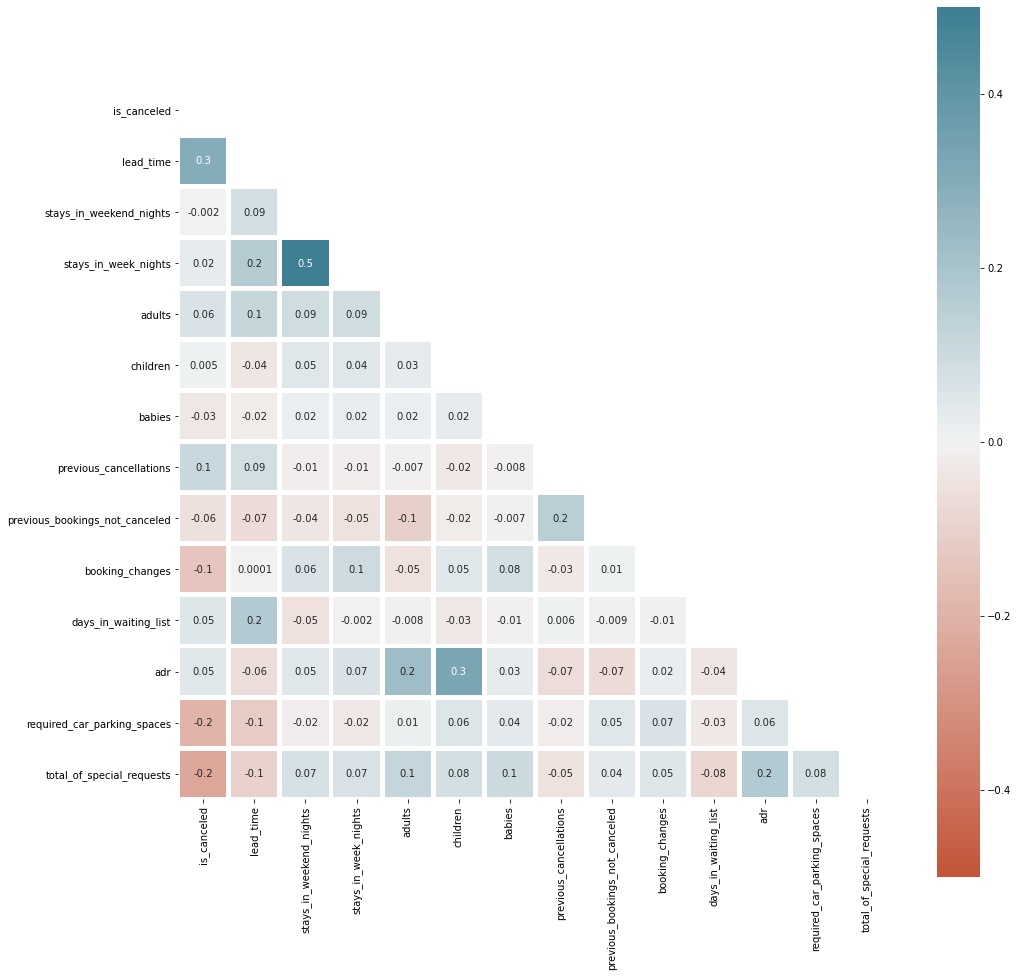

In [38]:
df2 = data.iloc[:, [1,2,7,8,9,10,11,17,18,21,25,27,28,29]]
corr= df2.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    corr,
    vmin=-.5, vmax=.5, center=0,
    cmap= sns.diverging_palette(20,220, n=200),
    square = True, 
    linewidth=4,
    annot = True, 
    fmt='.1g',
    mask = mask
    )

In [ ]:
#%% Histogram plots
for i in range(len(df. columns)):
    if is_string_dtype(df.iloc[:,i]):
        sns.countplot(df.iloc[:,i])
        plt.show
    else:
        sns.distplot(df.iloc[:,i],kde=False)
        plt.show()
        if sum(df.iloc[:,i]>(df.iloc[:,i].quantile(0.75)*2.5 - df.iloc[:,i].quantile(0.25)*1.5)) > 0:
            sns.distplot(df.iloc[:,i],kde=False)
            plt.ylim(0,10)
            plt.xlim(df.iloc[:,i].quantile(0.75),df.iloc[:,i].max()+5)
            plt.axvline(2.8, 0, df.iloc[:,i].quantile(0.75)*2.5 - df.iloc[:,i].quantile(0.25)*1.5, color = "red")
            plt.show()

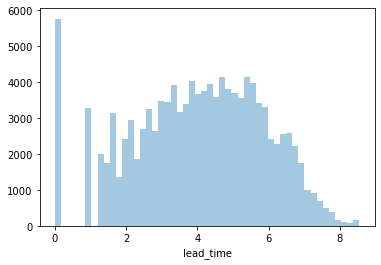

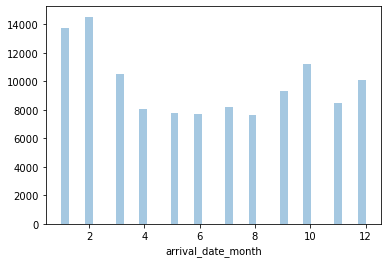

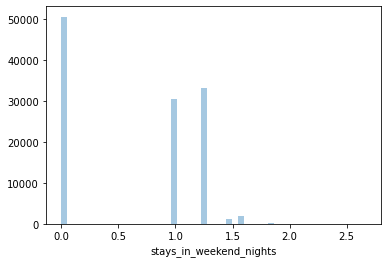

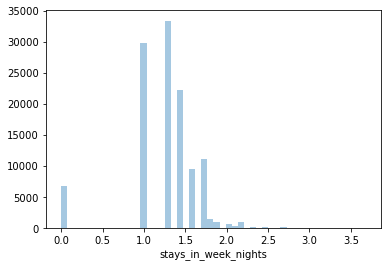

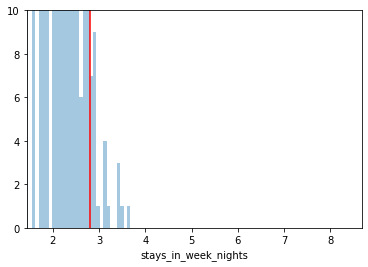

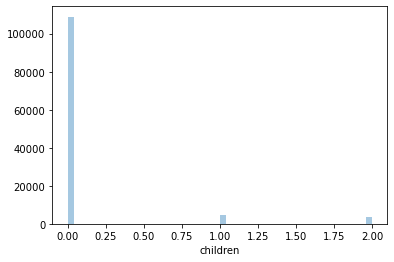

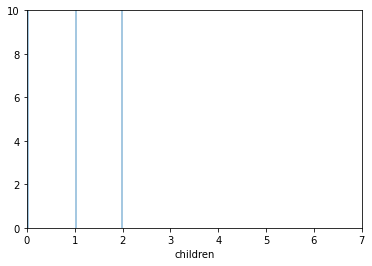

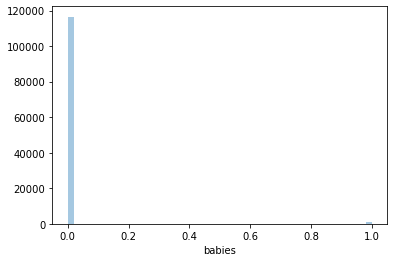

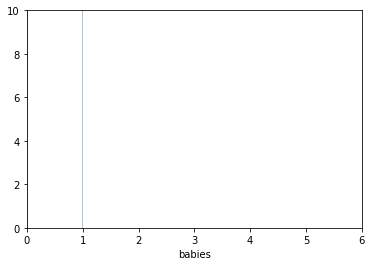

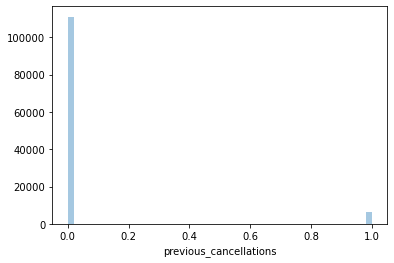

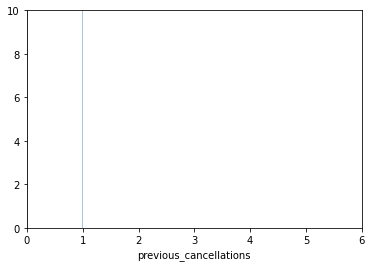

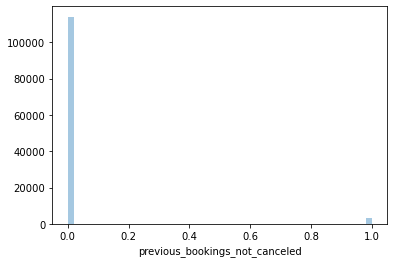

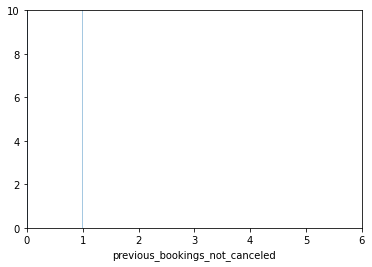

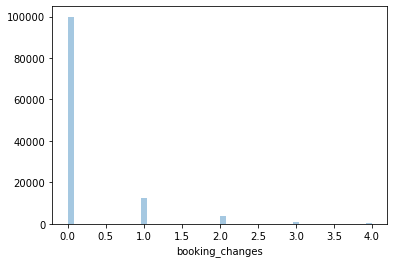

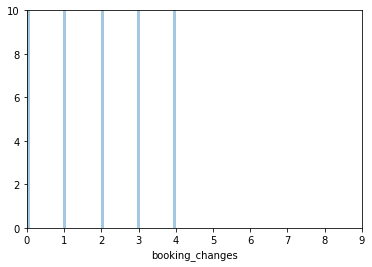

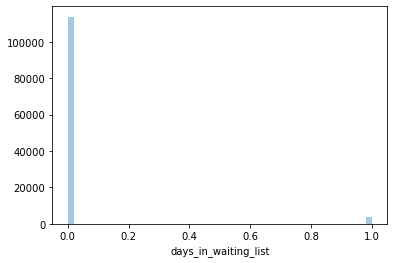

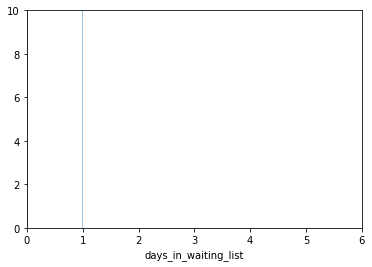

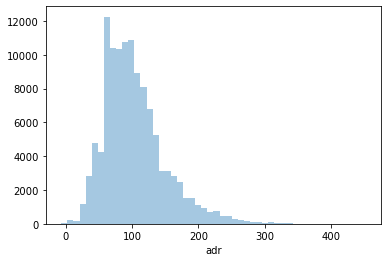

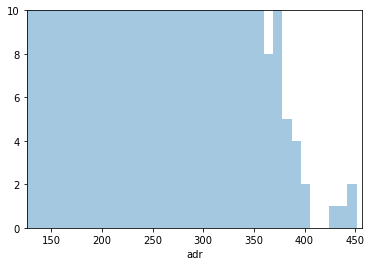

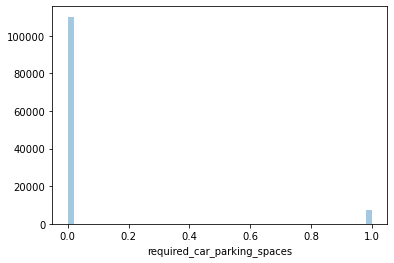

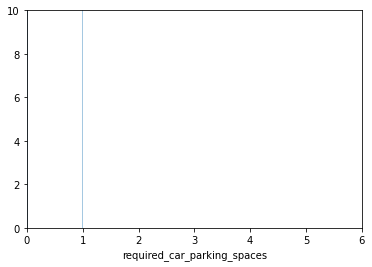

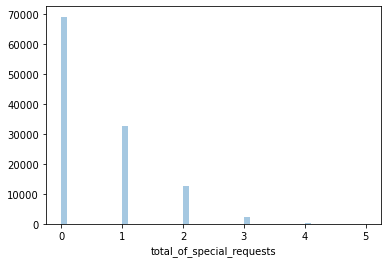

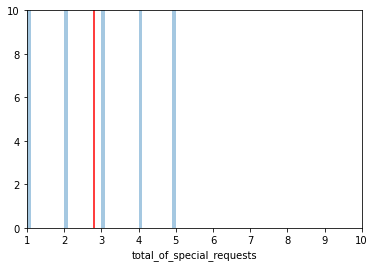

In [35]:
#Histogram for numeric
for i in range(len(df. columns)):
    if is_numeric_dtype(df.iloc[:,i]):
        sns.distplot(df.iloc[:,i],kde=False)
        plt.show()
        if sum(df.iloc[:,i]>(df.iloc[:,i].quantile(0.75)*2.5 - df.iloc[:,i].quantile(0.25)*1.5)) > 0:
            sns.distplot(df.iloc[:,i],kde=False)
            plt.ylim(0,10)
            plt.xlim(df.iloc[:,i].quantile(0.75),df.iloc[:,i].max()+5)
            plt.axvline(2.8, 0, df.iloc[:,i].quantile(0.75)*2.5 - df.iloc[:,i].quantile(0.25)*1.5, color = "red")
            plt.show()

In [ ]:
sns.displot(data = df, x = "adr", hue = "arrival_date_year")

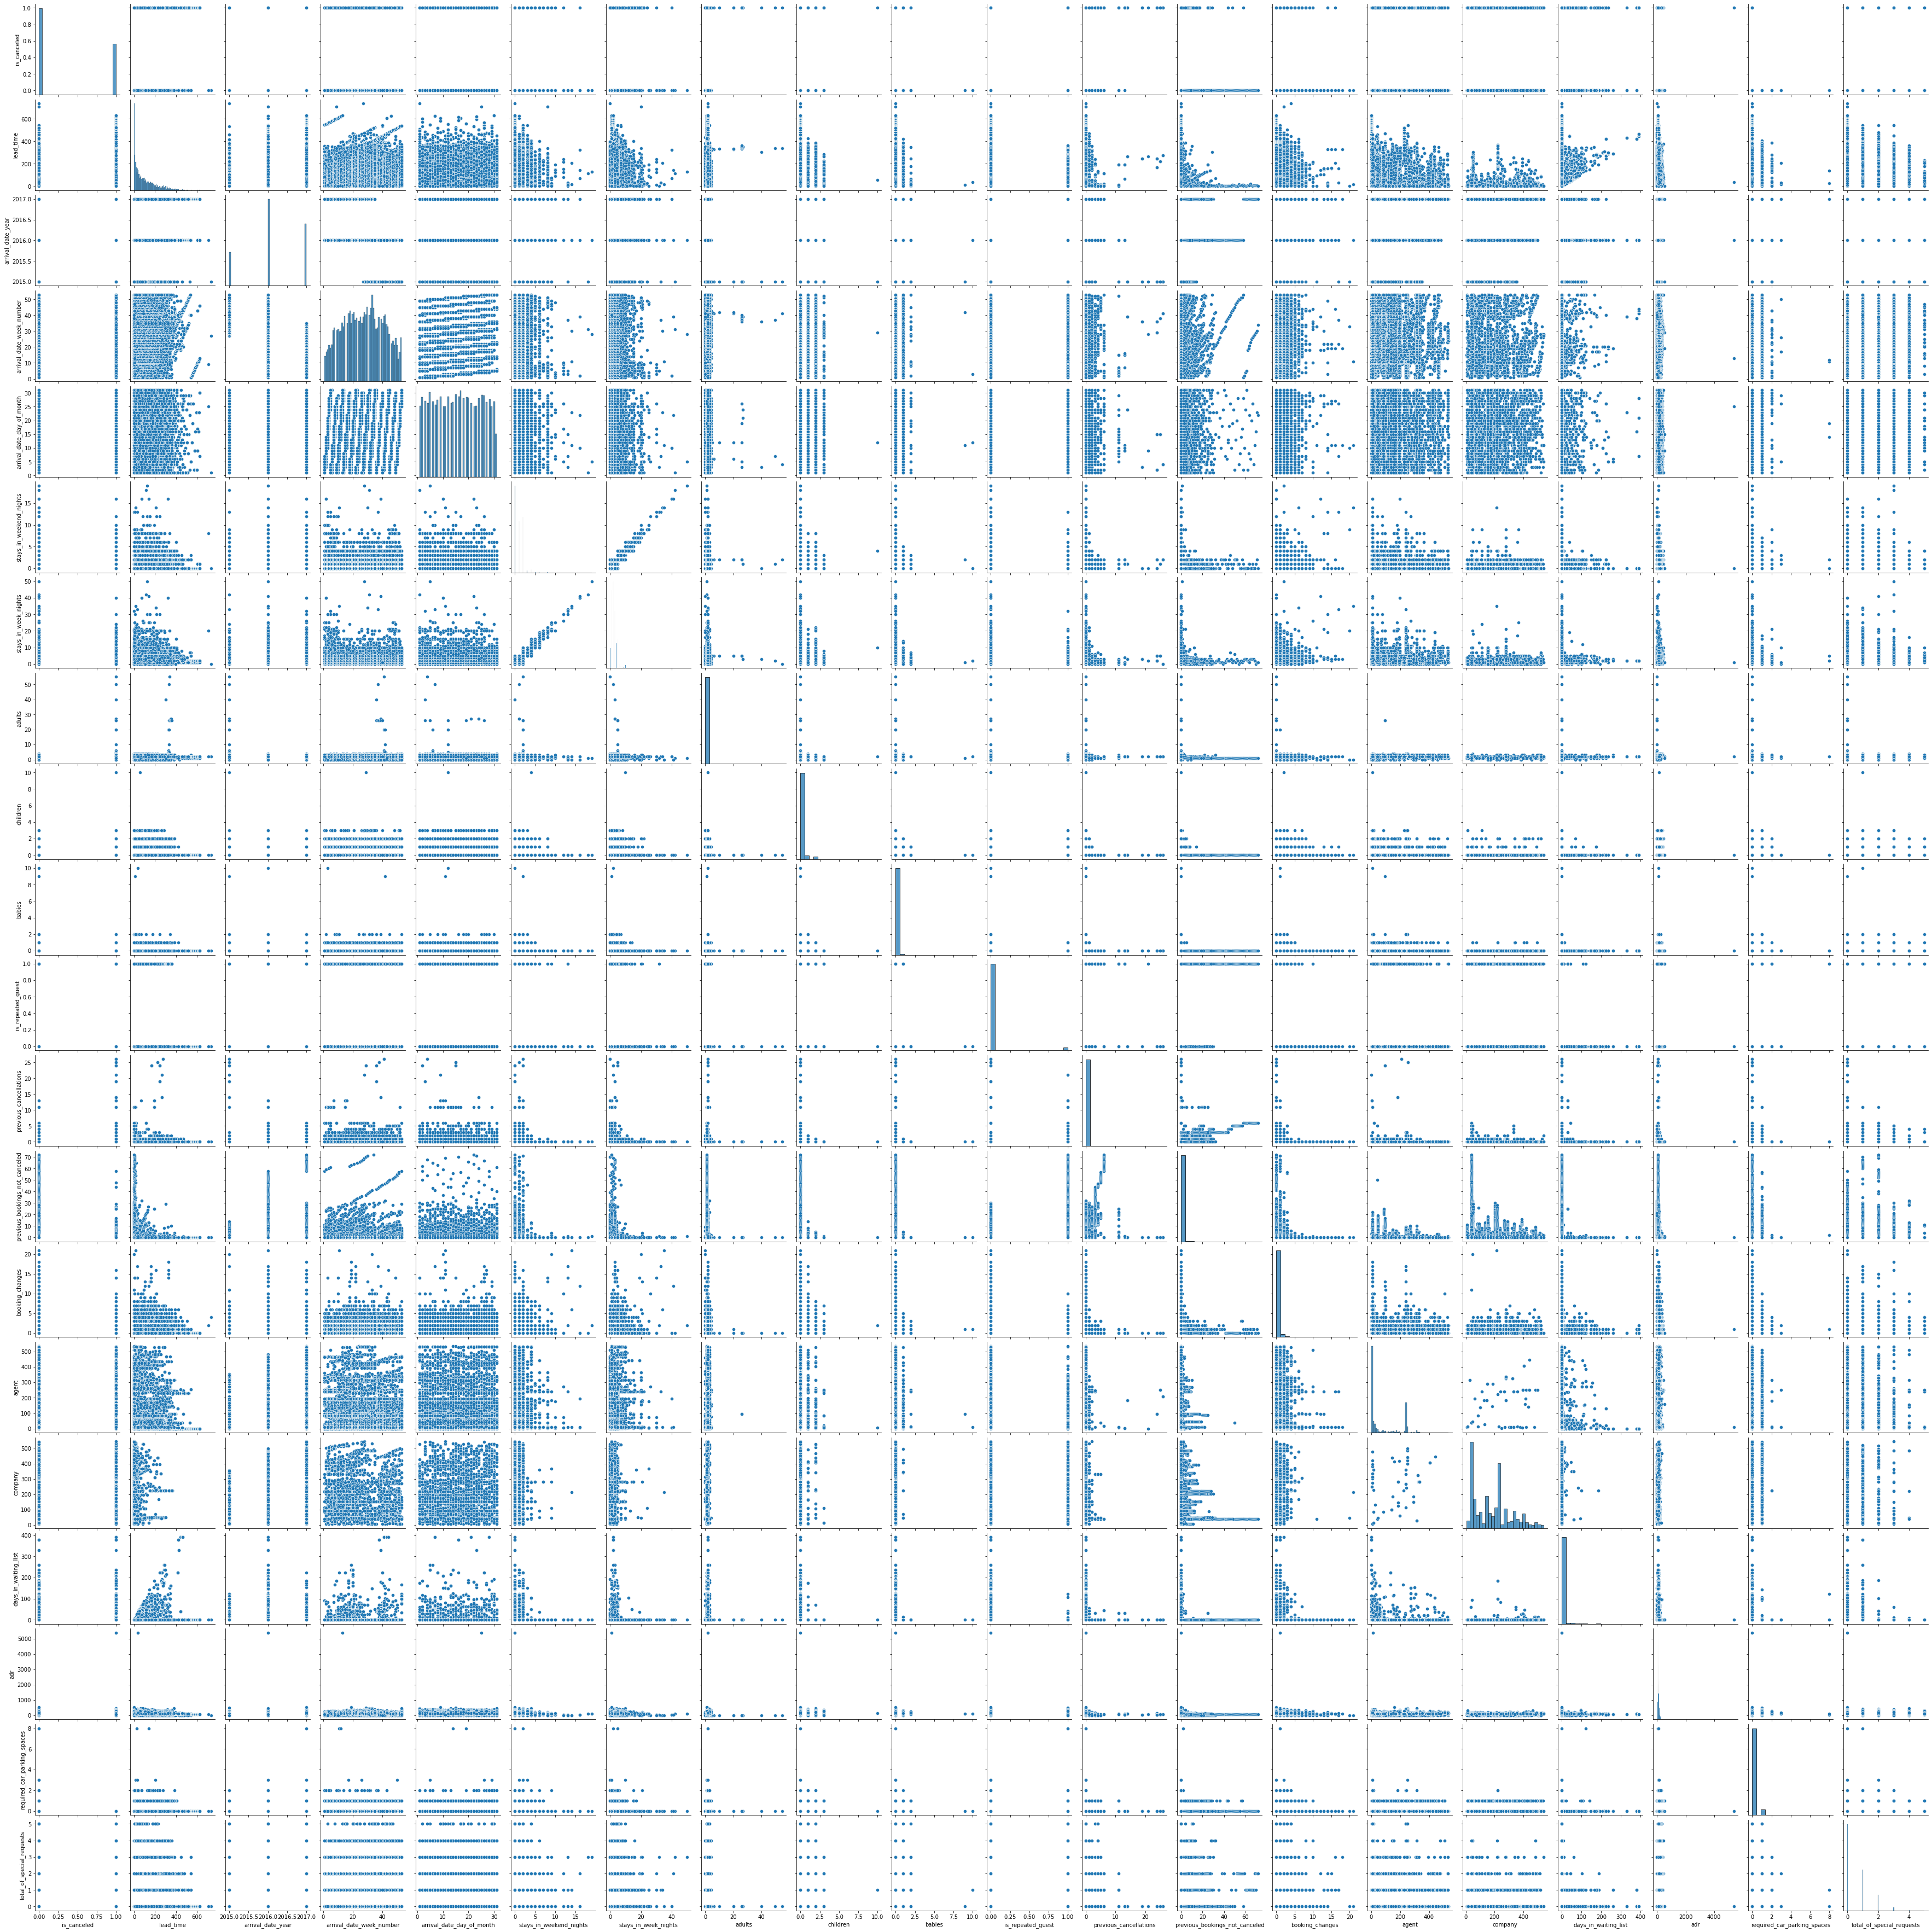

In [13]:
sns.pairplot(df)

In [ ]:
#%% Create all Scatter plots
num = list(df. columns)
for i in list(df. columns):
    for j in num:
        if is_string_dtype(df.loc[:,i]):
            sns.catplot(i,j,data = df)
            plt.show
        elif is_string_dtype(df.loc[:,j]):
            sns.catplot(j,i,data = df)
            plt.show
        else:
            sns.relplot(i,j,data = df)
            plt.show()
    del num[0]

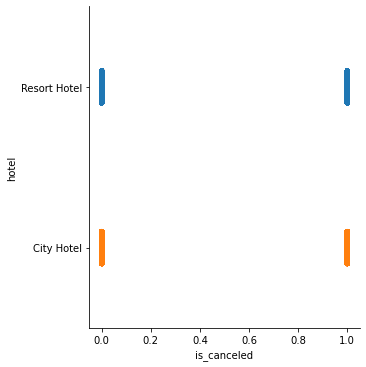

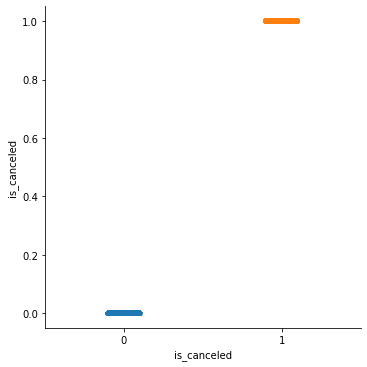

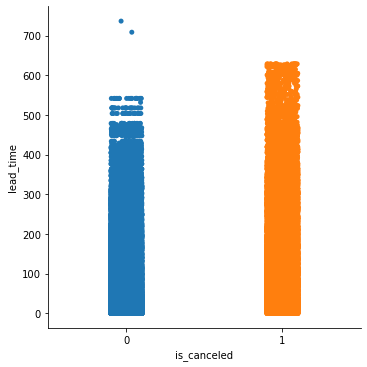

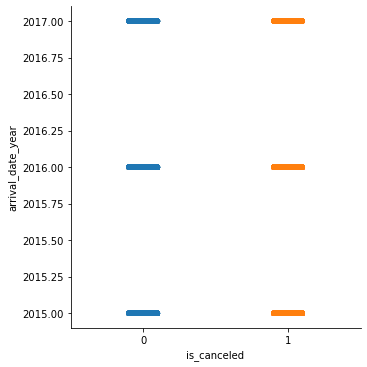

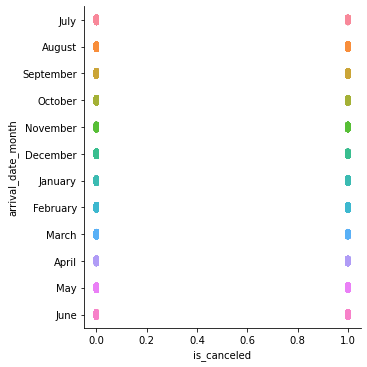

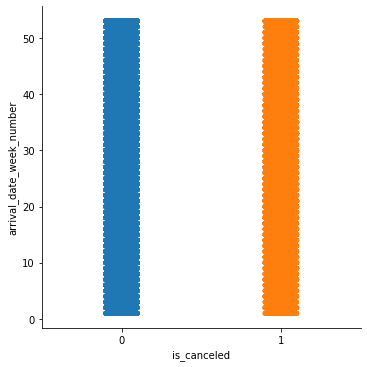

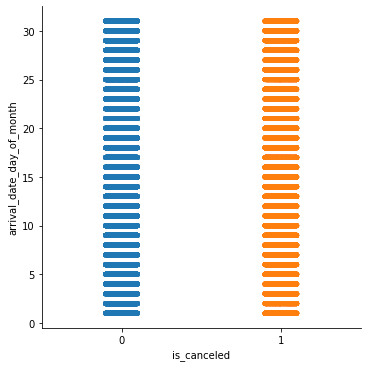

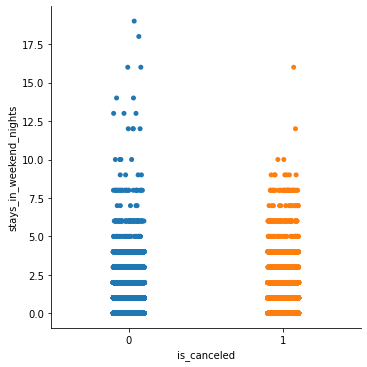

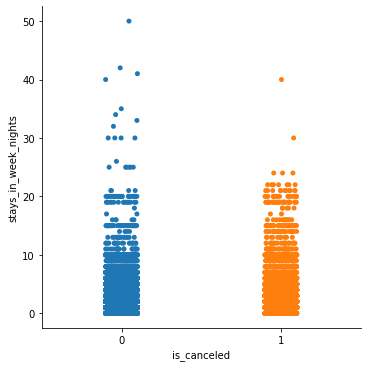

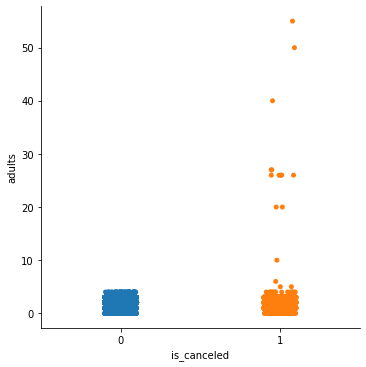

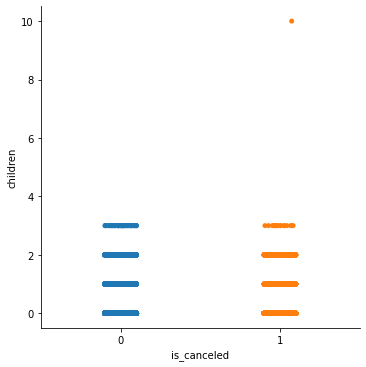

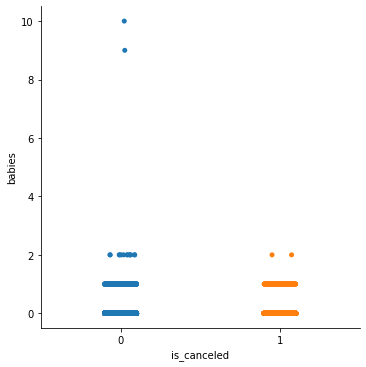

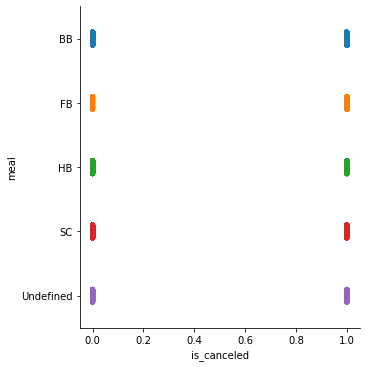

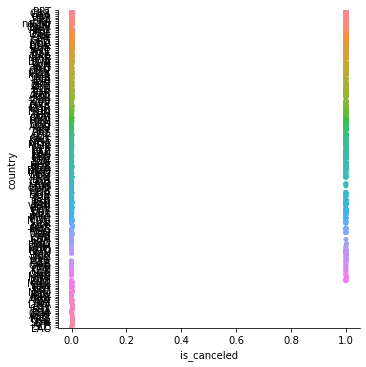

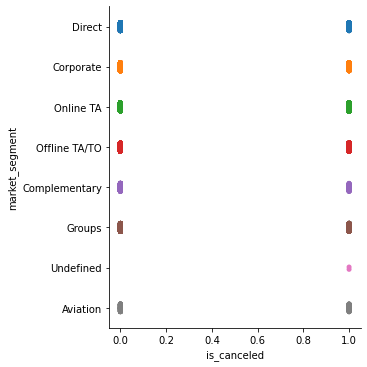

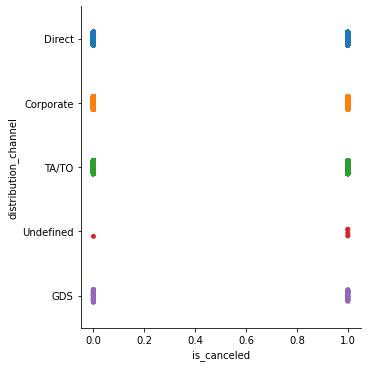

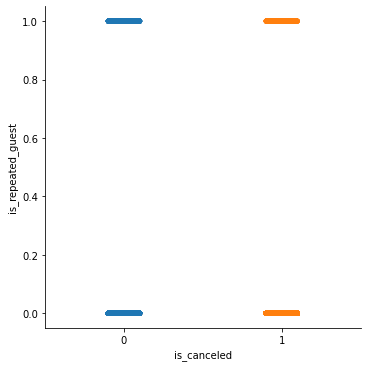

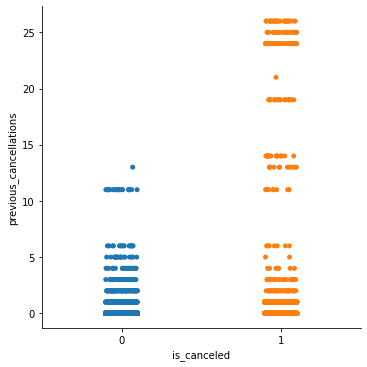

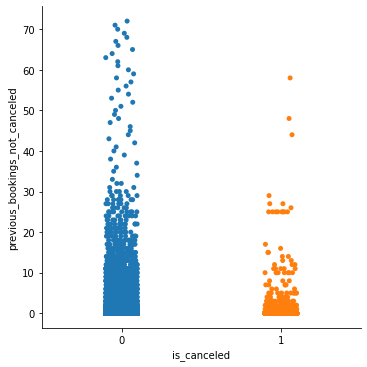

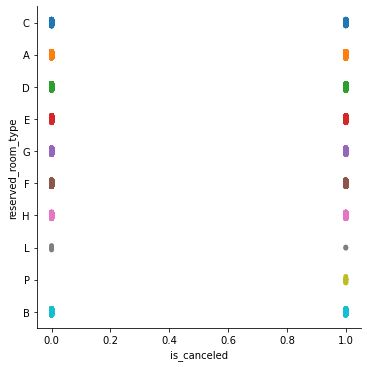

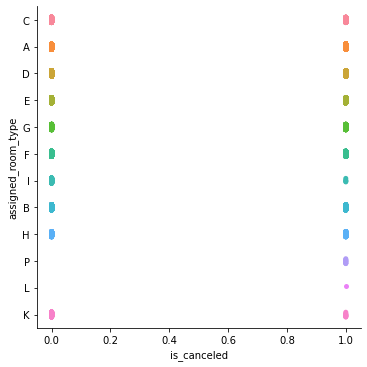

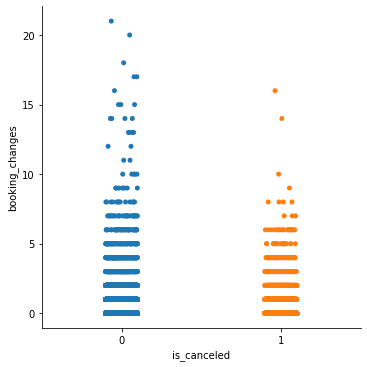

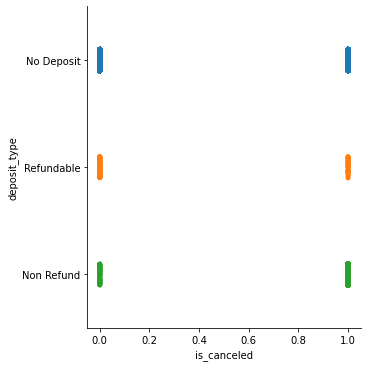

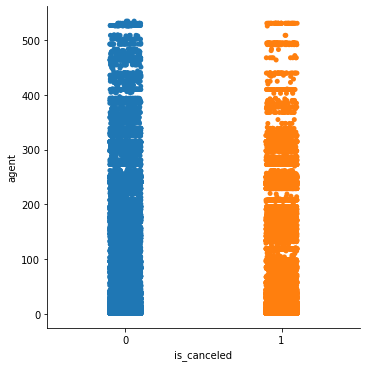

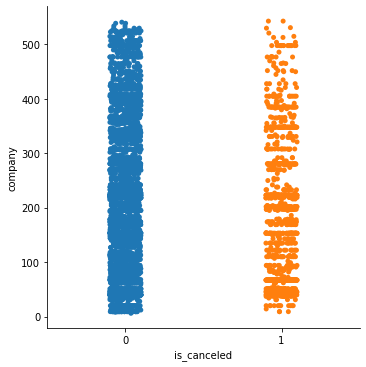

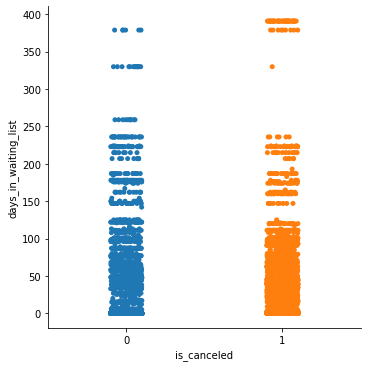

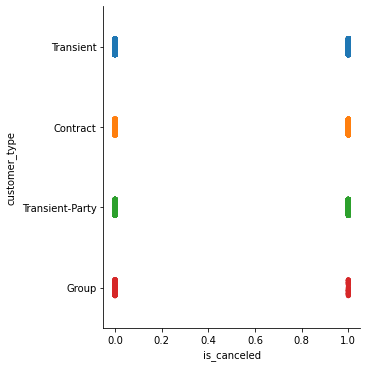

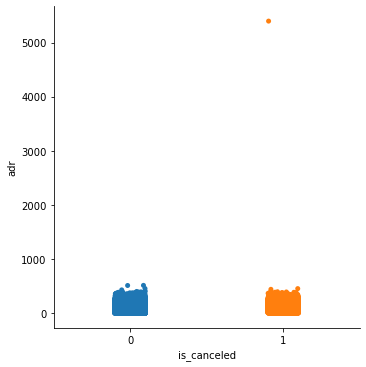

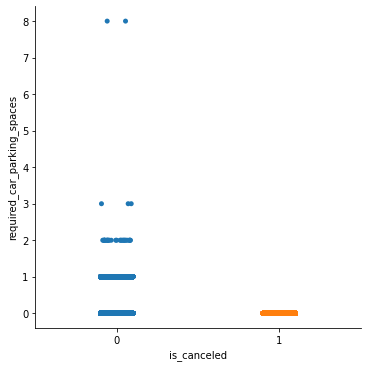

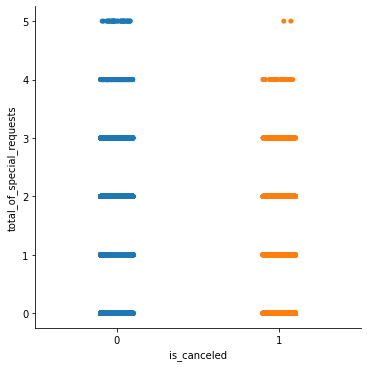

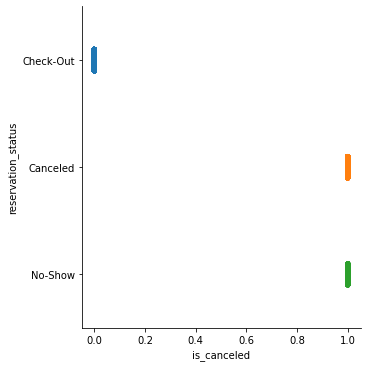

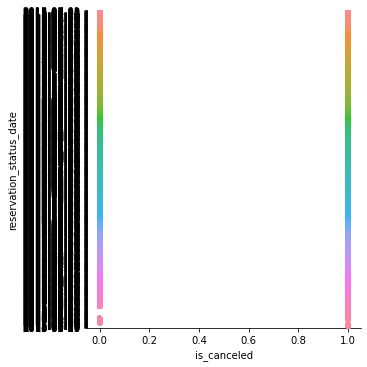

In [14]:
#Scatter plots against Y
for i in list(df. columns):
    sns.catplot("is_canceled",i,data = df)
    plt.show()

In [15]:
tmp = []
for i in df.columns:
    tmp.append(df[i].nunique())
    
#Unique count
col = list(df.columns)
unique_count = pd.DataFrame(list(zip(col, tmp)),columns = ["Columns","Unique_count"])
unique_count

,Columns,Unique_count
0,hotel,2
1,is_canceled,2
2,lead_time,479
3,arrival_date_year,3
4,arrival_date_month,12
5,arrival_date_week_number,53
6,arrival_date_day_of_month,31
7,stays_in_weekend_nights,17
8,stays_in_week_nights,35
9,adults,14


In [16]:
# Checking Percentages of is_canceled for each label
tmp = df.loc[:,["is_canceled","adults"]]
tmp.groupby(["adults","is_canceled"]).size()
tmp = tmp.groupby(["adults","is_canceled"]).size().reset_index(name='count')
a = tmp.groupby('adults')['count'].transform('sum')
tmp['count'] = tmp['count'].div(a)
tmp

,adults,is_canceled,count
0,0,0,0.729529
1,0,1,0.270471
2,1,0,0.710166
3,1,1,0.289834
4,2,0,0.606847
5,2,1,0.393153
6,3,0,0.653176
7,3,1,0.346824
8,4,0,0.741935
9,4,1,0.258065


In [17]:
#Checking the distribution of the column
tmp = df.loc[:,["lead_time"]]
tmp.groupby(["lead_time"]).size()/sum(tmp.count())

lead_time
0      0.053145
1      0.028981
2      0.017330
3      0.015211
4      0.014365
5      0.013108
6      0.012103
7      0.011148
8      0.009532
9      0.008309
10     0.008175
11     0.008837
12     0.009038
13     0.006877
14     0.008083
15     0.007027
16     0.007890
17     0.007379
18     0.006919
19     0.007027
20     0.006282
21     0.005679
22     0.005922
23     0.005386
24     0.005570
25     0.005469
26     0.005620
27     0.005436
28     0.006868
29     0.005964
30     0.005520
31     0.005737
32     0.005779
33     0.005386
34     0.006935
35     0.005486
36     0.005553
37     0.005637
38     0.004816
39     0.005637
40     0.006047
41     0.005084
42     0.003886
43     0.004012
44     0.005302
45     0.004498
46     0.004146
47     0.004758
48     0.004238
49     0.004012
50     0.004414
51     0.003066
52     0.003644
53     0.004439
54     0.003953
55     0.004816
56     0.005662
57     0.003828
58     0.003359
59     0.004355
60     0.003652
61     0.00429

# Feature Selection/Transformation/Remove high leverge points and outliers

In [4]:
# Combining subtle conutries into regions

cc=pd.read_csv("Region_Label.csv")
cc.head()
country_dict = dict(zip(cc["alpha-3"], cc["sub-region"]))

tmp1 = df.loc[:,["country"]]
tmp1 = tmp1.value_counts().reset_index()
tmp1 = list(tmp1[tmp1[0] < 487]["country"])

for key in list(country_dict.keys()):
    if key in tmp1:
        print("")
    else:
        del country_dict[key]
        
df.replace({"country": country_dict}, inplace = True)
df.head()
df["country"].value_counts()

tmp1 = df.loc[:,["country"]]
tmp1 = tmp1.value_counts().reset_index()
tmp1 = list(tmp1[tmp1[0] < 487]["country"])
tmp = df["country"].to_frame()
tmp[tmp.country.isin(tmp1)] = "others"
df["country"] = tmp
df["country"] = df["country"].fillna("no_fill")
df["country"].value_counts()

PRT                                48590
GBR                                12129
FRA                                10415
ESP                                 8568
DEU                                 7287
ITA                                 3766
IRL                                 3375
BEL                                 2342
BRA                                 2224
others                              2169
NLD                                 2104
USA                                 2097
CHE                                 1730
CN                                  1279
AUT                                 1263
Northern Europe                     1176
SWE                                 1024
CHN                                  999
POL                                  919
Sub-Saharan Africa                   672
ISR                                  669
Latin America and the Caribbean      661
Eastern Europe                       635
RUS                                  632
NOR             

0
0
0
0
0
0
0
0
1
1
1
1


<AxesSubplot:xlabel='adr', ylabel='Density'>

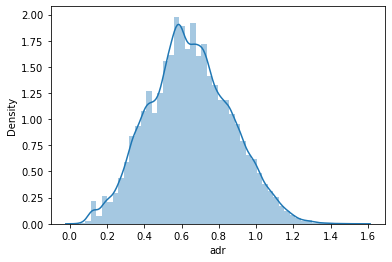

In [5]:
#transforming adr into percentage price changes based on pervious month
tmp = df.loc[:,["arrival_date_year","arrival_date_month","lead_time","adr"]]
tmp.dtypes
tmp.head()

tmp1 = tmp["arrival_date_month"].to_frame()
cleanup_categ =  {"January": "1", "February": "2", "March": "3", "April": "4",
                 "May": "5", "June": "6", "July": "7", "August": "8", "September": "9", 
                 "October": "10", "November": "11", "December": "12"}
tmp1.replace(cleanup_categ, inplace = True)
tmp1.head(10)
tmp1["arrival_date_month"] = tmp1["arrival_date_month"].astype(int)
tmp.arrival_date_month = tmp1.arrival_date_month

tmp.lead_time = tmp["lead_time"]//7
month = tmp["lead_time"]//4
year = month//12
tmp.arrival_date_year = tmp.arrival_date_year - year
month = month%12
tmp.arrival_date_month = tmp.arrival_date_month - month

for i in range(len(tmp)):
    if tmp.iloc[i,1] < 1:
        tmp.iloc[i,1] = 12 + tmp.iloc[i,1]
        tmp.iloc[i,0] = tmp.iloc[i,0] - 1
        
tmp = tmp.loc[:,["arrival_date_year","arrival_date_month"]]
tmp.groupby(["arrival_date_year","arrival_date_month"]).size()

df.arrival_date_year = tmp.arrival_date_year
df.arrival_date_month = tmp.arrival_date_month

df = df[df["arrival_date_year"]!=2013]
for j in [1,3,4,4,4,5,6,6,6,7]:
    for i in range(len(df)):
        if df.iloc[i,3] == 2014:
            if df.iloc[i,4] == j:
                df = df.drop(df.index[i])
                break
df = df[df["adr"] != 0]
df = df[df["adr"]<500]

tmp = df.loc[:,["arrival_date_year","arrival_date_month","adr"]]
tmp1 = tmp.loc[:,["arrival_date_year","arrival_date_month"]]
tmp1.groupby(["arrival_date_year","arrival_date_month"]).size()

tmp1 = tmp.groupby(["arrival_date_year","arrival_date_month"]).mean().reset_index()
tmp1

tmp1.arrival_date_month = tmp1.arrival_date_month + 1
for i in range(len(tmp1)):
    if tmp1.iloc[i,1] == 13:
        tmp1.iloc[i,1] = 1
        tmp1.iloc[i,0] = tmp1.iloc[i,0] + 1
tmp1 = tmp1[:-1]

for j in [8,8,8,8,8,8,8,8,8,8]:
    for i in range(len(df)):
        if df.iloc[i,3] == 2014:
            if df.iloc[i,4] == j:
                df = df.drop(df.index[i])
                break
tmp = df.loc[:,["arrival_date_year","arrival_date_month","adr"]]

for i in [2014,2015,2016,2017]:
    for j in [1,2,3,4,5,6,7,8,9,10,11,12]:
        if (i == 2014)&(j < 9):
            print(0)
            continue
        elif (i == 2017) & (j > 8):
            print(1)
            continue
        avg = float(tmp1.loc[(tmp1["arrival_date_year"]==i)&(tmp1["arrival_date_month"]==j),"adr"])
        tmp.loc[(tmp["arrival_date_year"]==i)&(tmp["arrival_date_month"]==j),"adr"] = (tmp.loc[(tmp["arrival_date_year"]==i)&(tmp["arrival_date_month"]==j),"adr"].to_frame() - avg)/avg
        
tmp.isnull().sum()
tmp.arrival_date_year.value_counts()
tmp.arrival_date_month.value_counts()
tmp.adr.value_counts()

tmp.adr = (tmp.adr)**0.333

sns.distplot(tmp.adr)

In [6]:
# Combining inactive agents
tmp1 = data.loc[:,["agent","arrival_date_year"]]
tmp1["agent"] = tmp1["agent"].fillna(0)
tmp1 = tmp1.groupby(["agent","arrival_date_year"]).size()
tmp1 = tmp1.reset_index()
tmp1.dtypes

# >100 in 2017
tmp = tmp1[tmp1.arrival_date_year == 2017]
tmp.groupby(0).size()
tmp = tmp[tmp[0] > 100]
tmp1 = tmp1[tmp1.agent.isin(tmp.agent)]

# >500
tmp = tmp1.groupby(["agent"]).sum()
tmp = tmp[tmp[0] > 500]

tmp1 = data.loc[:,"agent"].to_frame()
tmp1["agent"] = tmp1["agent"].fillna(0)
tmp = tmp1[tmp1.isin(list(tmp.index))]

tmp.value_counts()
tmp.isnull().sum()
tmp["agent"] = tmp["agent"].fillna(0.1)

df.agent = tmp

# 0 = no agent, 0.1 = others
tmp.value_counts()

agent
0.1      33870
9.0      31961
0.0      16340
240.0    13922
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
8.0       1514
19.0      1061
40.0      1039
314.0      927
242.0      780
83.0       696
85.0       554
dtype: int64

In [7]:
#drop columns that may cause data leakage and the columns that duplicate or not provide any information
df.drop("reservation_status",axis =1, inplace = True)
df.drop("company",axis =1, inplace = True)
df.drop("assigned_room_type",axis =1, inplace = True)
df.drop("reservation_status_date",axis =1, inplace = True)
df.drop("arrival_date_year",axis =1, inplace = True)
df.drop("arrival_date_day_of_month",axis =1, inplace = True)
df.drop("arrival_date_week_number",axis =1, inplace = True)

In [8]:
df["children"] = df["children"].fillna(0)

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

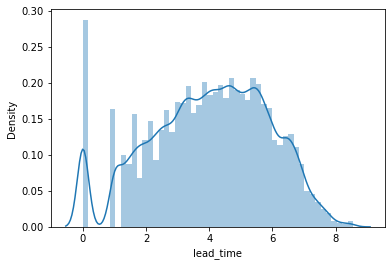

In [9]:
# lead time -- numeric cube rooted
df['lead_time'] = (df['lead_time'])**0.333
sns.distplot(df['lead_time'])

In [10]:
# adults -- numeric, combine 4+
df.loc[df["adults"] > 4,"adults"] = 4
df["adults"].value_counts()

2    88764
1    22163
3     6174
0      248
4       60
Name: adults, dtype: int64

In [11]:
# babies Binary
df.loc[df["babies"]>0,"babies"] = 1
df["babies"].value_counts()

0    116517
1       892
Name: babies, dtype: int64

In [12]:
# children remove outlier
df = df[df.children != 10]
df["children"].value_counts()

0.0    108912
1.0      4807
2.0      3614
3.0        75
Name: children, dtype: int64

In [13]:
#previous_cancellations -- as binary categorical
df.loc[df["previous_cancellations"] > 0,"previous_cancellations"] = 1 # 0 = no cancel 1 = yes cancel
df["previous_cancellations"].value_counts()

0    111016
1      6392
Name: previous_cancellations, dtype: int64

In [14]:
#required_car_parking_spaces -- binary categorical
df.loc[df["required_car_parking_spaces"]>1,"required_car_parking_spaces"] = 1
df["required_car_parking_spaces"].value_counts()

0    110102
1      7306
Name: required_car_parking_spaces, dtype: int64

In [15]:
#days_in_waiting_list -- as binary categorical
df.loc[df["days_in_waiting_list"]>0,"days_in_waiting_list"] = 1
df["days_in_waiting_list"].value_counts()

0    113742
1      3666
Name: days_in_waiting_list, dtype: int64

In [16]:
#reserved_room_type	- drop L and P
indexL = df[df['reserved_room_type'] == 'L'].index
indexP = df[df['reserved_room_type'] == 'P'].index
df.drop(indexL, inplace=True)
df.drop(indexP, inplace=True)
df["reserved_room_type"].value_counts()

A    84565
D    19001
E     6414
F     2824
G     2006
B     1085
C      913
H      594
Name: reserved_room_type, dtype: int64

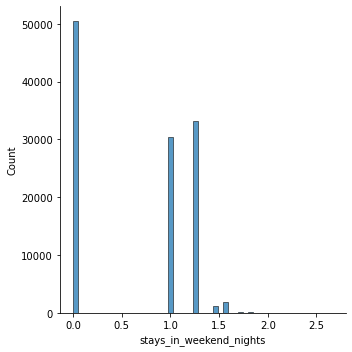

In [17]:
#stays_in_weekend_nights -- numeric cube rooted
df['stays_in_weekend_nights'] = (df['stays_in_weekend_nights'])**0.333
sns.displot(df['stays_in_weekend_nights'])

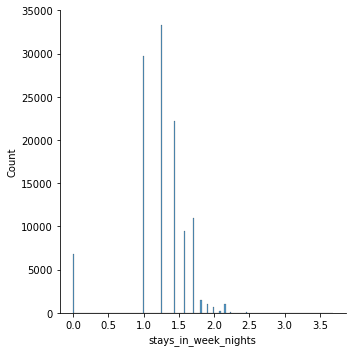

In [18]:
#stays_in_week_nights -- numeric cube rooted
df['stays_in_week_nights'] = (df['stays_in_week_nights'])**0.333
sns.displot(df['stays_in_week_nights'])

In [19]:
#previous_bookings_not_canceled -- as binary categorical
df.loc[df["previous_bookings_not_canceled"] > 0,"previous_bookings_not_canceled"] = 1 # 0 = no cancel 1 = yes cancel
df["previous_bookings_not_canceled"].value_counts()

0    114058
1      3344
Name: previous_bookings_not_canceled, dtype: int64

# Modeling

In [20]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                         float64
arrival_date_month                  int64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [21]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
for i in range(len(df.columns)):
    if is_string_dtype(df.iloc[:,i]):
        print(i)
        df.iloc[:,i] = df.iloc[:,i].str.replace(" ","")
    else:
        continue

0
9
10
11
12
16
18
21


In [22]:
df = df.reset_index()

In [23]:
del df['index']

In [24]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,ResortHotel,0,1.911691,7,0.0,1.00000,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,0,NoDeposit,0.0,0,Transient,75.0,0,0
1,ResortHotel,0,2.349325,7,0.0,1.00000,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,NoDeposit,0.1,0,Transient,75.0,0,0
2,ResortHotel,0,2.408023,7,0.0,1.25963,2,0.0,0,BB,GBR,OnlineTA,TA/TO,0,0,0,A,0,NoDeposit,240.0,0,Transient,98.0,0,1
3,ResortHotel,0,2.408023,7,0.0,1.25963,2,0.0,0,BB,GBR,OnlineTA,TA/TO,0,0,0,A,0,NoDeposit,240.0,0,Transient,98.0,0,1
4,ResortHotel,0,0.000000,7,0.0,1.25963,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,0,NoDeposit,0.0,0,Transient,107.0,0,0


In [25]:
x_cat = df[['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
            'deposit_type', 'agent', 'customer_type']]

In [26]:
x_num = df.loc[:,['lead_time','stays_in_weekend_nights', 'stays_in_week_nights',
              'children','babies','adr','total_of_special_requests',
              'arrival_date_month','adults','is_repeated_guest', 'previous_cancellations',
              'booking_changes', 'previous_bookings_not_canceled','days_in_waiting_list'
               ,'required_car_parking_spaces']]
y = df["is_canceled"]

In [27]:
X = x_cat[:]

In [28]:
from sklearn.preprocessing import LabelEncoder

X = X.iloc[:,0:].values

color_le = LabelEncoder()
for i in range(9):
    X[:, i] = color_le.fit_transform(X[:, i])
X

array([[1, 0, 11, ..., 0, 0, 2],
       [1, 0, 11, ..., 0, 1, 2],
       [1, 0, 11, ..., 0, 12, 2],
       ...,
       [0, 0, 7, ..., 0, 5, 2],
       [0, 0, 11, ..., 0, 1, 2],
       [0, 2, 7, ..., 0, 5, 2]], dtype=object)

In [29]:
x_cat = pd.DataFrame(X) 

In [30]:
X = pd.concat([x_num,x_cat],axis=1)

In [31]:
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

np.random.seed(42) # Ensure reproducability

In [60]:
from sklearn.model_selection import train_test_split

#Split Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

# Decision Tree

In [238]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'min_samples_leaf': list(range(1, 23)),
                              'max_depth': list(range(3, 16)),
                             "criterion": ["gini","entropy"]}],
                  scoring='f1_macro', # Specifying multiple metrics for evaluation
                  cv=inner_cv)

In [239]:
gs_dt = gs.fit(X,y)

In [240]:
print("\n Parameter Tuning #1")
print("Non-nested CV f1_macro: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


 Parameter Tuning #1
Non-nested CV f1_macro:  0.839149627795867
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 8}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=8,
                       random_state=42)
Nested CV f1_macro:  0.8383100583528638  +/-  0.0022594775151945005


# Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                  param_grid=[{'max_depth': [10, 15, 25],
                               'n_estimators': [100,300,500],
                             "criterion": ["gini","entropy"]}],
                  scoring='f1_macro', 
                  cv=inner_cv)

In [250]:
gs_rf = gs.fit(X,y) 

In [251]:
print("\n Parameter Tuning #2")
print("Non-nested CV f1_macro: ", gs_rf.best_score_)
print("Optimal Parameter: ", gs_rf.best_params_)
print("Optimal Estimator: ", gs_rf.best_estimator_)
nested_score_gs_rf = cross_val_score(gs_rf, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_gs_rf.mean(), " +/- ", nested_score_gs_rf.std())


 Parameter Tuning #2
Non-nested CV f1_macro:  0.8766151817401401
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 500}
Optimal Estimator:  RandomForestClassifier(max_depth=25, n_estimators=500, random_state=42)
Nested CV f1_macro:  0.8768325830679148  +/-  0.001358974784105742


# Standardization and KNN

In [110]:
X2 = X[:]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X2)
X_std = sc.transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [259]:
gs = GridSearchCV(estimator=neighbors.KNeighborsClassifier(metric='minkowski'),
                  param_grid=[{'n_neighbors': list(range(3,25)),
                              "p": [1,2],
                              'weights':['uniform','distance']}],
                  scoring='f1_macro',
                  cv=inner_cv)
#n = 21 weight = distance

In [260]:
gs_knn = gs.fit(X_std,y)

In [261]:
print("\n Parameter Tuning #3")
print("Non-nested CV f1_macro: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X_std, y=y, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 Parameter Tuning #3
Non-nested CV f1_macro:  0.859325439959092
Optimal Parameter:  {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=21, p=1, weights='distance')
Nested CV f1_macro:  0.85869597052228  +/-  0.0015960548056195996


# Feature Engineering & Logistic Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
quadratic = PolynomialFeatures(degree=2)

In [ ]:
x_cat = df[['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
            'deposit_type', 'agent', 'customer_type']]

In [ ]:
x_num = df.loc[:,['lead_time','stays_in_weekend_nights', 'stays_in_week_nights',
              'children','babies','adr','total_of_special_requests',
              'arrival_date_month','adults','is_repeated_guest', 'previous_cancellations',
              'booking_changes', 'previous_bookings_not_canceled','days_in_waiting_list'
               ,'required_car_parking_spaces']]
y = df["is_canceled"]

In [ ]:
X = x_cat[:]

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = X.iloc[:,0:].values

color_le = LabelEncoder()
for i in range(9):
    X[:, i] = color_le.fit_transform(X[:, i])
X

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder()
x1 = oe.fit_transform(X[:,0:]).toarray()

In [ ]:
x_cat = pd.DataFrame(X) 

In [ ]:
X = pd.concat([x_num,x_cat],axis=1)

In [31]:
tmp = df.loc[:,["is_canceled","children"]]
tmp.groupby(["children","is_canceled"]).size()
tmp = tmp.groupby(["children","is_canceled"]).size().reset_index(name='count')
a = tmp.groupby('children')['count'].transform('sum')
tmp['count'] = tmp['count'].div(a)
tmp

,children,is_canceled,count
0,0.0,0,0.624575
1,0.0,1,0.375425
2,1.0,0,0.675265
3,1.0,1,0.324735
4,2.0,0,0.578205
5,2.0,1,0.421795


In [32]:
tmp = df.loc[:,["is_canceled","stays_in_week_nights"]]
tmp.groupby(["stays_in_week_nights","is_canceled"]).size()
tmp = tmp.groupby(["stays_in_week_nights","is_canceled"]).size().reset_index(name='count')
a = tmp.groupby('stays_in_week_nights')['count'].transform('sum')
tmp['count'] = tmp['count'].div(a)
tmp

,stays_in_week_nights,is_canceled,count
0,0.000000,0,0.726605
1,0.000000,1,0.273395
2,1.000000,0,0.672001
3,1.000000,1,0.327999
4,1.259630,0,0.555342
5,1.259630,1,0.444658
6,1.441722,0,0.617179
7,1.441722,1,0.382821
8,1.586668,0,0.633764
9,1.586668,1,0.366236


In [ ]:
X["child_quad"] = (X.children)**2

In [ ]:
X["week_nights_quad"] = (X.stays_in_week_nights)**2

In [36]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
gs = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000,],
                              "penalty":["l2","l1"], 'solver' : ['liblinear','saga']}],
                  scoring='f1_macro',
                  cv=inner_cv)

In [ ]:
gs_lr = gs.fit(X,y)

In [54]:
print("\n Parameter Tuning #3")
print("Non-nested CV f1_macro: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())


 Parameter Tuning #3
Non-nested CV f1_macro:  0.7709231245439081
Optimal Parameter:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Optimal Estimator:  LogisticRegression(C=10, random_state=42, solver='liblinear')
Nested CV f1_macro: 0.7709642085578601  +/-  0.002286703728775058


# SVM

In [37]:
from sklearn.svm import LinearSVC

In [ ]:
gs = GridSearchCV(estimator=LinearSVC(random_state=42),
                  param_grid=[{'C': [ 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000,],
                              "penalty":["l2","l1"], 'class_weight' : ['dict','balanced']}],
                  scoring='f1_macro',
                  cv=inner_cv)

In [ ]:
gs_svm = gs.fit(X,y)

In [55]:
print("\n Parameter Tuning #3")
print("Non-nested CV f1_macro: ", gs_svm.best_score_)
print("Optimal Parameter: ", gs_svm.best_params_)
print("Optimal Estimator: ", gs_svm.best_estimator_)
nested_score_gs_svm = cross_val_score(gs_svm, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro:",nested_score_gs_svm.mean(), " +/- ", nested_score_gs_svm.std())


 Parameter Tuning #3
Non-nested CV f1_macro:  0.7685562827057746
Optimal Parameter:  {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Optimal Estimator:  LinearSVC(C=0.01, class_weight='balanced', random_state=42)
Nested CV f1_macro: 0.7667631265595599  +/-  0.0032378423443177777


# Evalueation

In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, score = "accuracy",
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = score)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

In [39]:
# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt

# Learning Curve

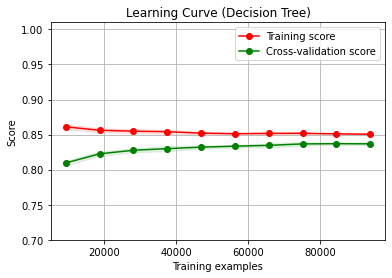

In [46]:
np.random.seed(42)

title = "Learning Curve (Decision Tree)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=8,
                       random_state=42) # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4, score = "f1_macro")

plt.show() # Display the figure

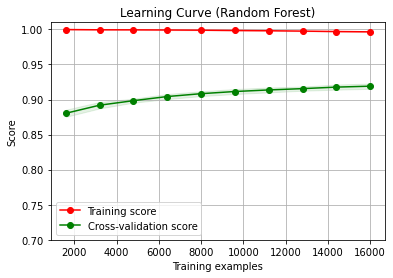

In [47]:
np.random.seed(42)

title = "Learning Curve (Random Forest)"

X1 = X.head(20000)
y1 = y.head(20000)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth=25, n_estimators=500, random_state=42)
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X1, y1, (0.7, 1.01), cv=cv, n_jobs=4, score = "f1_macro")

plt.show() # Display the figure

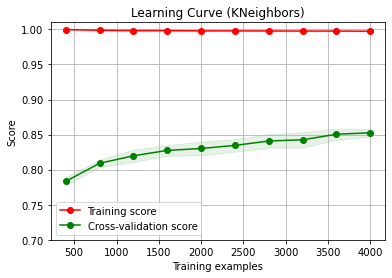

In [42]:
np.random.seed(42)

X22 = X2.head(5000)
y1 = y.head(5000)

title = "Learning Curve (KNeighbors)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = neighbors.KNeighborsClassifier(n_neighbors=21, p=1, weights='distance')
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X22, y1, (0.7, 1.01), cv=cv, n_jobs=4, score = "f1_macro")

plt.show() # Display the figure

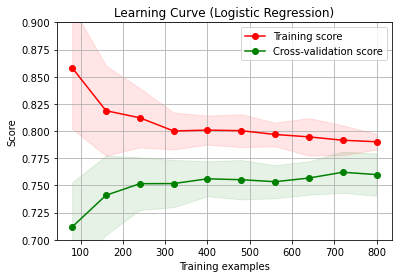

In [48]:
np.random.seed(42)
X1 = X.head(1000)
y1 = y.head(1000)

title = "Learning Curve (Logistic Regression)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = LogisticRegression(C=10, random_state=42, solver='liblinear')
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X1, y1, (0.7, 0.9), cv=cv, n_jobs=4, score = "f1_macro")

plt.show() # Display the figure

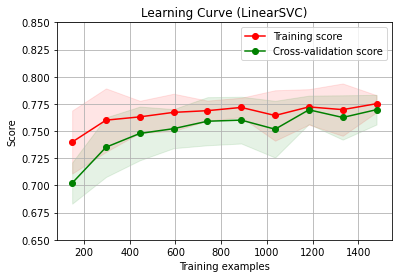

In [56]:
np.random.seed(42)

X1 = X.head(1850)
y1 = y.head(1850)

title = "Learning Curve (LinearSVC)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = LinearSVC(C=0.01, class_weight='balanced', random_state=42)
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X1, y1, (0.65, 0.85), cv=cv, n_jobs=4, score = "f1_macro")

plt.show() # Display the figure

# Fitting curve

In [57]:
# Fitting curve (aka validation curve)
# Determine training and test scores for varying parameter values.
from sklearn.model_selection import validation_curve
# Split validation
from sklearn.model_selection import train_test_split

np.random.seed(42) #the seed used by the random number generator for np

In [121]:
param_range=list(range(1, 20))

In [62]:
x_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
x_test_std = sc.transform(X_test) # Perform standardization of test set X by centering and scaling

In [73]:
# Determine training and test scores for varying parameter values.
X_train = X_train.head(10000)
y_train = y_train.head(10000)

train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(random_state=42),
                X=X_train, 
                y=y_train, 
                param_name="max_depth", 
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="f1_macro", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

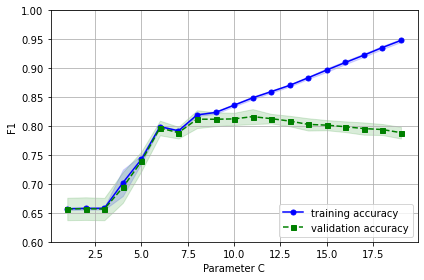

In [74]:
# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('F1')
plt.ylim([0.6, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

In [76]:
# Determine training and test scores for varying parameter values.
X_train = X_train.head(5000)
y_train = y_train.head(5000)

train_scores, test_scores = validation_curve( 
                estimator=RandomForestClassifier(random_state=42),
                X=X_train, 
                y=y_train, 
                param_name="max_depth", 
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="f1_macro", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

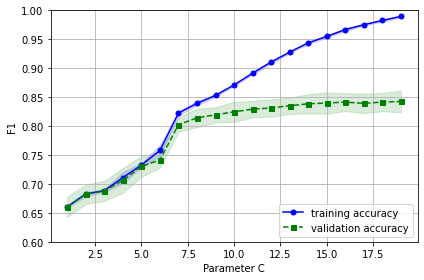

In [77]:
# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('F1')
plt.ylim([0.6, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

In [88]:
# Determine training and test scores for varying parameter values.
X_train = X_train.head(5000)
y_train = y_train.head(5000)

train_scores, test_scores = validation_curve( 
                estimator=neighbors.KNeighborsClassifier(),
                X=X_train, 
                y=y_train, 
                param_name="n_neighbors", 
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="f1_macro", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

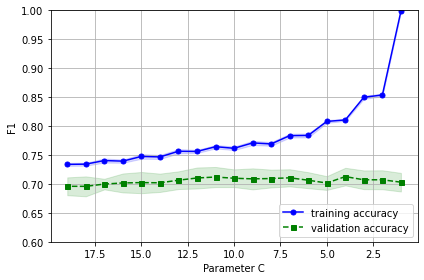

In [89]:
# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('F1')
plt.ylim([0.6, 1.0]) # y limits in the plot
plt.tight_layout()
plt.gca().invert_xaxis()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

In [162]:
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10]
# Determine training and test scores for varying parameter values.
X_train = X_train.head(10000)
y_train = y_train.head(10000)

train_scores, test_scores = validation_curve( 
                estimator=LogisticRegression(random_state=42),
                X=X_train, 
                y=y_train, 
                param_name="C", 
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="f1_macro", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

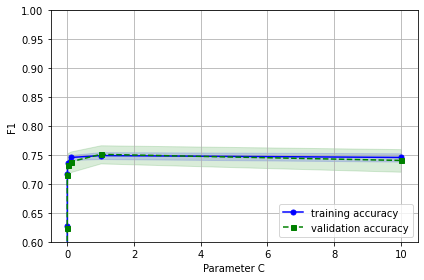

In [163]:
# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('F1')
plt.ylim([0.6, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

In [164]:
# Determine training and test scores for varying parameter values.
X_train = X_train.head(10000)
y_train = y_train.head(10000)

train_scores, test_scores = validation_curve( 
                estimator=LinearSVC(random_state=42),
                X=X_train, 
                y=y_train, 
                param_name="C", 
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="f1_macro", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

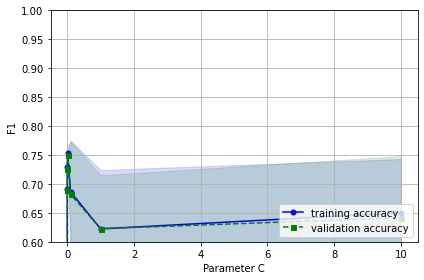

In [165]:
# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('F1')
plt.ylim([0.6, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

# ROC

In [102]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [107]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=8,
                       random_state=42) 

# Decision Tree Classifier
clf2 = RandomForestClassifier(max_depth=25, n_estimators=500, random_state=42)

# kNN Classifier
clf3 = KNeighborsClassifier(n_neighbors=21, p=1, weights='distance')

clf4 = LogisticRegression(C=10, random_state=42, solver='liblinear')

clf5 = LinearSVC(C=0.01, class_weight='balanced', random_state=42)

# Label the classifiers
clf_labels = ["Decision Tree", "Random Forest", 'kNN', 'Logistic regression', "SVM"]
all_clf = [clf1, clf2, clf3,clf4,clf5]

In [108]:
X1 = X.head(5000)
y1 = y.head(5000)

print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2, clf3,clf4,clf5], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X1,
                             y=y1,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.86 (+/- 0.06) [Decision Tree]
ROC AUC: 0.91 (+/- 0.06) [Random Forest]
ROC AUC: 0.79 (+/- 0.12) [kNN]
ROC AUC: 0.86 (+/- 0.09) [Logistic regression]
ROC AUC: 0.85 (+/- 0.07) [SVM]


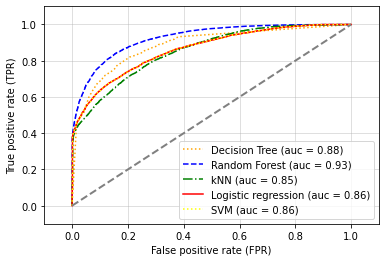

In [112]:
X_train = X_train.head(5000)
y_train = y_train.head(5000)
colors = [ 'orange', 'blue', 'green',"red","yellow"]      # Colors for visualization
linestyles = [':', '--', '-.', '-', 'dotted']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    if label != "SVM":
        y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    elif label == "kNN":
        y_pred = clf.fit(X_train2,
                     y_train).predict_proba(X_test2)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()